### Load Packages

In [1]:
from sklearn.datasets import load_iris

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

### Prepare Data

In [3]:
iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [4]:
X.shape

(150, 2)

### Split Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.20,
                                            random_state=1)

### Build Model

In [7]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Evaluation

In [8]:
print("Training Score: ",dt.score(xtrain,ytrain))
print("Testing Score: ",dt.score(xtest,ytest))

Training Score:  0.9916666666666667
Testing Score:  0.9666666666666667


### Visualization

In [9]:
import pandas as pd

In [10]:
dt.feature_importances_

array([0.0898817, 0.9101183])

In [11]:
iris.feature_names[2:]

['petal length (cm)', 'petal width (cm)']

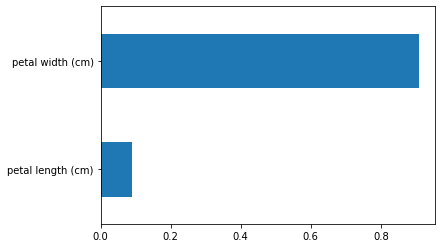

In [12]:
pd.Series(dt.feature_importances_,index=iris.feature_names[2:]).plot(kind="barh")

In [13]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

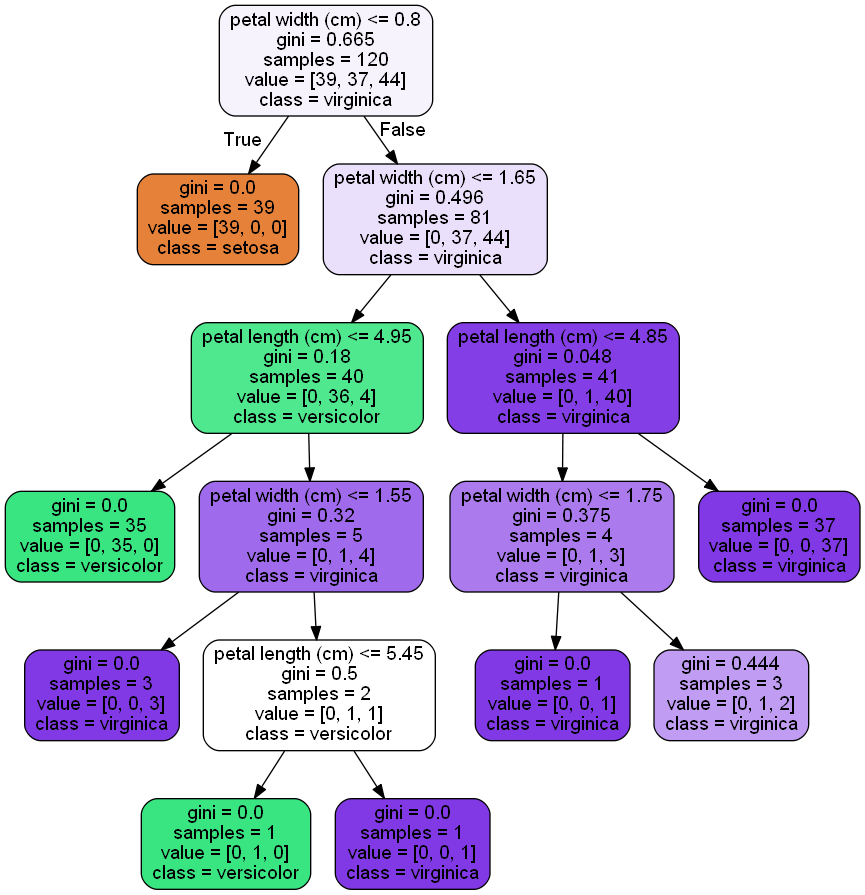

In [14]:
dot_data = export_graphviz(dt,
                          feature_names=iris.feature_names[2:],
                          class_names=iris.target_names,
                          rounded=True,
                          filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Save Image

In [15]:
graph.write_png("decision_tree.png")

True